# 1. В файле __"fruits.csv"__ содержатся данные о весе и цвете различных фруктов.

## А) Считать данные с диска, с помощью функции `pandas.read_csv.` 
## Б) Вывести на экран количество считанных строк и столбцов. 
## В) Вывести названия столбцов данных, уникальные значения для столбцов `target, color.` 
## Г) Построить гистограмму распределения значений `weight` при условии `target = “apple”.` 


# -------------------------------------------------------------------------------------------------------------------------------

### А) Считать данные с диска, с помощью функции `pandas.read_csv`.

In [1]:
import pandas as pd  #  импортируется библиотека pandas.
import numpy as np   #  импортируется библиотека numpy.
import matplotlib.pyplot as plt  #  импортируется библиотека для построения 
                                    #графиков

#from jupyterthemes import jtplot
#jtplot.style(theme='oceans16', context='notebook', ticks=True, grid=False)

In [2]:
fruits = pd.read_csv('fruits.csv')  #  считывается таблица из файла
fruits.head(10)                     #  выводится на экран первые десять элементов

,target,weight,color
0,apple,91.234258,red
1,apple,125.134927,red
2,orange,101.313929,orange
3,apple,102.218174,green
4,apple,89.982126,red
5,orange,97.522840,orange
6,orange,96.137338,orange
7,apple,130.858706,green
8,apple,110.950357,green
9,apple,59.390054,red


### Б) Вывести на экран количество считанных строк и столбцов. 

In [3]:
#  встроенными командами python: shape
print("Размер массива = ", fruits.shape)                        #  отображается размер входного файла(размерность)
print("Количество строк = ", fruits.shape[0])
print("Количество столбцов = ", fruits.shape[1])

#  командами len, columns, index
print("Количество строк = ", len(fruits.index))
print("Количество столбцов = ", len(fruits.columns))

Размер массива =  (10000, 3)
Количество строк =  10000
Количество столбцов =  3
Количество строк =  10000
Количество столбцов =  3


### В) Вывести названия столбцов данных, уникальные значения для столбцов `target, color.` 

In [4]:
print("Названия столбцов: ", ", ".join(set(fruits.columns)))
print("Уникальные значения столбца 'targets': ", set(fruits['target'].unique()))
print("Уникальные значения столбца 'colours': ", set(fruits['color'].unique()))

Названия столбцов:  color, target, weight
Уникальные значения столбца 'targets':  {'apple', 'orange'}
Уникальные значения столбца 'colours':  {'orange', 'red', 'green'}


### Г) Построить гистограмму распределения значений `weight` при условии `target = “apple”.` 

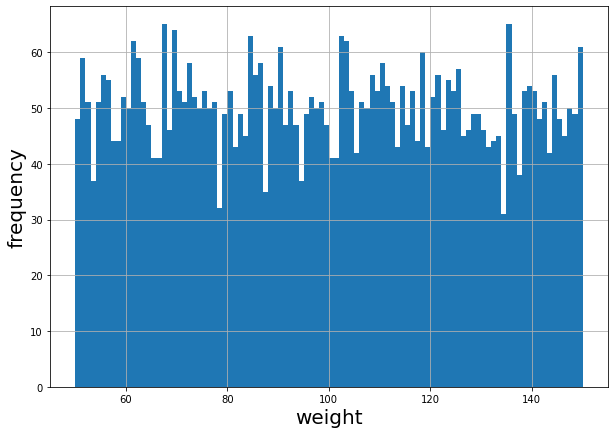

In [5]:
plt.figure(figsize=(10, 7))
plt.xlabel('weight', fontsize=20)
plt.ylabel('frequency', fontsize=20)
fruits[fruits['target']=='apple']['weight'].hist(bins = 100)

# 2. Программа, приведенная ниже, генерирует __pandas.Dataframe__ содержащий выборку из двух случайных переменных. Найти 95% доверительные интервалы их математического ожидания. Для справки: $Z_{2.5}$=1,96.

In [6]:
x = pd.DataFrame(np.random.random((100, 2)), columns=["x1", "x2"])

In [7]:
x

,x1,x2
0,0.603863,0.237079
1,0.348356,0.456283
2,0.301865,0.132781
3,0.748431,0.219955
4,0.564642,0.038192
...,...,...
95,0.678812,0.721489
96,0.388559,0.089582
97,0.391475,0.219546
98,0.115636,0.683476


In [8]:
x.shape

(100, 2)

Сначала попробуем найти доверительный интервал без использования дополнительных иснтрументов.
Для известного стандартного отклонения можно воспользоваться формулой:
$$\left(\bar{x}-z^{*} \frac{\sigma}{\sqrt{n}}, \bar{x}+z^{*} \frac{\sigma}{\sqrt{n}}\right)$$

In [9]:
np.mean(x)  #  средние значения через numpy

x1    0.510565
x2    0.494360
dtype: float64

In [10]:
np.std(x)  #  стандартное отклонения через numpy

x1    0.276725
x2    0.294168
dtype: float64

In [11]:
z = 1.96

#  для x1
x1mean = np.mean(x)[0]
x1std = np.std(x)[0]
x1left = x1mean - z * x1std / x.shape[0]**0.5
x1right = x1mean + z * x1std / x.shape[0]**0.5
print("Среднее значение = ", x1mean, "\nДоверительный интервал : ", \
      "(", x1left, " ", x1right, ")")

Среднее значение =  0.5105654332613768 
Доверительный интервал :  ( 0.45632733163403427   0.5648035348887194 )


In [12]:
#  для x2
x2mean = np.mean(x)[1]
x2std = np.std(x)[1]
x2left = x2mean - z * x2std / x.shape[0]**0.5
x2right = x2mean + z * x2std / x.shape[0]**0.5
print("Среднее значение = ", x2mean, "\nДоверительный интервал : ", \
      "(", x2left, " ", x2right, ")")

Среднее значение =  0.4943604272435777 
Доверительный интервал :  ( 0.4367034738327169   0.5520173806544385 )


####  Расчет доверительного интервала функцией

In [13]:
#  расчет доверительного интервала функцией
import scipy.stats 

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [14]:
mean_confidence_interval(x["x1"])

(0.510565433261377, 0.4553805704275868, 0.5657502960951674)

In [15]:
mean_confidence_interval(x["x2"])

(0.49436042724357754, 0.435697034353208, 0.5530238201339471)

#### Расчет доверительного интервала встроенной функцией `t.interval`

In [16]:
import scipy.stats as st 

print("для x1:")
print(x1mean, st.t.interval(0.95, len(x.x1)-1, loc=np.mean(x.x1), scale=st.sem(x.x1))) 

print("\nдля x2:")
print(x2mean, st.t.interval(0.95, len(x.x2)-1, loc=np.mean(x.x2), scale=st.sem(x.x2))) 

для x1:
0.5105654332613768 (0.4553805704275868, 0.5657502960951674)

для x2:
0.4943604272435777 (0.435697034353208, 0.5530238201339471)


#### Вывод
- Методы расчета доверительного интервала созданной функцией и встроенной функцией дают одинаковые результаты, однако не удалось получить хорошего результата без использования встроенных функций

- Возможно, это связано с тем, что встроенные методы используют более точные функции

# 3. Программа, приведенная ниже, генерирует два файла x0.csv и x1.csv, содержащих переменную x. Используя библиотеку __mpi4py__, написать программу для параллельного расчета суммы переменной х. Файл x0.csv должен быть обработан в потоке с rank=0, x1.csv в потоке c rank=1. Сумма должна быть получена в потоке с rank=0.

### Здесь пример, как выглядят таблицы, сама программа в файле __mpi1.py__

In [17]:
size = 10000
pd.DataFrame(np.random.random(size=size),columns=['x']).to_csv('x0.csv')
pd.DataFrame(np.random.random(size=size),columns=['x']).to_csv('x1.csv')

In [18]:
#Считывание таблиц
data0 = pd.read_csv("x0.csv")
data1 = pd.read_csv("x1.csv")

In [19]:
data0

,Unnamed: 0,x
0,0,0.642684
1,1,0.298797
2,2,0.779761
3,3,0.552826
4,4,0.434188
...,...,...
9995,9995,0.244993
9996,9996,0.292641
9997,9997,0.824746
9998,9998,0.536920


In [20]:
data1

,Unnamed: 0,x
0,0,0.185593
1,1,0.957821
2,2,0.443200
3,3,0.744897
4,4,0.346386
...,...,...
9995,9995,0.403885
9996,9996,0.628035
9997,9997,0.066884
9998,9998,0.986310


## Непосредственный запуск программы
- `mpiexec` - команда MPI 
- `-n` - количество потоков, которые выделяются для обработки данных
- `python` (в моем случае в системном пути __python = python3__) - ___ВАЖНО!___

In [21]:
# запускаем команду 
!mpiexec -n 2 python ./mpi1.py

Сумма всех элементов X =  984.9446254337465
